In [4]:
from CausalModule import CausalModule
# from run_effect_estimation import run_effect_estimation
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# data_url = "https://raw.githubusercontent.com/FenTechSolutions/CausalDiscoveryToolbox/master/cdt/data/resources/cyto_full_data.csv"
# data = pd.read_csv(data_url) 
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']
data['v0'] = data['v0'].astype(int)
data['y'] = data['y'].astype(int)
print(data.head())
print(dataset['treatment_name'])
print(dataset['outcome_name'])
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]
treatment_value = 1
control_value = 0

    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  1.0  0.938241  0.442256 -1.320275 -1.577609 -0.546439 -1.689902   1  0
1  1.0  0.438492 -1.055093  1.696716  0.070025 -0.892429  1.474811   1  1
2  1.0  0.117618 -0.963062 -0.230991 -2.209398  1.327790 -0.913193   0  0
3  1.0  0.618683  0.999005  0.581337 -2.549807 -0.059121 -1.847706   1  0
4  1.0  0.456301  0.779210  0.311392 -1.042394  1.144109 -1.000018   1  1
['v0']
y


2025-08-13 17:30:48,971 INFO: CausalModule initialized with provided parameters.
2025-08-13 17:30:48,972 INFO: Finding causal graph using pc algorithm
/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
Depth=7, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 1793.20it/s]

['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y']


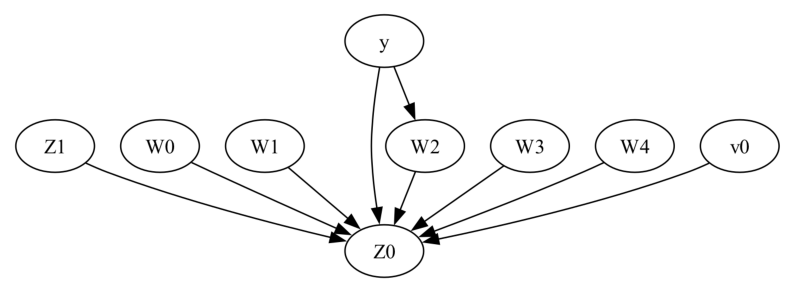

2025-08-13 17:30:49,358 INFO: Creating a causal model from the discovered/given causal graph
2025-08-13 17:30:49,358 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']
2025-08-13 17:30:49,359 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-13 17:30:49,359 WARNING: No directed path from treatment to outcome. Causal Effect is zero.
2025-08-13 17:30:49,360 INFO: No directed path from ['v0'] to ['y'] in the causal graph.
Causal effect is zero.
2025-08-13 17:30:49,360 INFO: Note that you can also use other methods for the identification process. Below are method descriptions taken directly from DoWhy's documentation
2025-08-13 17:30:49,360 INFO: maximal-adjustment: returns the maximal set that satisfies the backdoor criterion. This is usually the fastest way to find a valid backdoor set, but the set may contain many superfluous variables.
2025-08-13 17:30:49,361 INFO: minimal-adjustment: returns the set with minimal number of va

TypeError: 'NoneType' object is not subscriptable

In [6]:
# Initialize the CausalModule with the provided parameters
causal_module = CausalModule(
    data=data,
    discovery_algorithm=discovery_algorithm,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
    treatment_value=treatment_value,
    control_value=control_value
)

# Find the causal graph
causal_module.find_causal_graph()
print(causal_module.graph.nodes())
# Refute the causal graph
# causal_module.refute_cgm(n_perm=10)

causal_module.see_graph()

# Create a causal graph model
causal_module.create_model()
# Identify the estimand
causal_module.identify_effect()
# Estimate the effect
causal_module.estimate_effect()
# Refute the estimate
causal_module.refute_estimate()

# Save results to CSV (default directory is 'outputs/results')
causal_module.store_results()

In [ ]:
interventional_samples = causal_module.simulate_intervention(
    variable_to_intervene_dict={
        "v0": lambda x: 1,
        "Z0": lambda x: 0,
        "Z1": lambda x: 0.5,
        "W0": lambda x: -1,
        "W1": lambda x: 1,
        "W2": lambda x: 0.5,
        "W3": lambda x: -1,
        "W4": lambda x: -2,
        },
    num_samples_to_draw=5000
)

KeyboardInterrupt: 

In [ ]:
type(interventional_samples)

pandas.core.frame.DataFrame

In [ ]:
interventional_samples.head()

,Z1,W0,W1,W2,W3,W4,Z0,v0,y
0,0.5,-1,1,0.5,-1,-2,0,1,0
1,0.5,-1,1,0.5,-1,-2,0,1,0
2,0.5,-1,1,0.5,-1,-2,0,1,0
3,0.5,-1,1,0.5,-1,-2,0,1,0
4,0.5,-1,1,0.5,-1,-2,0,1,0


In [ ]:
causal_module.store_results()

2025-08-13 01:03:34,482 INFO: ==========================================
2025-08-13 01:03:34,483 INFO: Number of nodes: 11
2025-08-13 01:03:34,484 INFO: ==========================================
2025-08-13 01:03:34,484 INFO: Number of edges: 41
2025-08-13 01:03:34,485 INFO: ==========================================
2025-08-13 01:03:34,486 INFO: Edge: praf -> pmek, Weight: 1
2025-08-13 01:03:34,487 INFO: Edge: praf -> PKA, Weight: 1
2025-08-13 01:03:34,487 INFO: Edge: praf -> PKC, Weight: 1
2025-08-13 01:03:34,488 INFO: Edge: praf -> pjnk, Weight: 1
2025-08-13 01:03:34,488 INFO: Edge: pmek -> PKA, Weight: 1
2025-08-13 01:03:34,488 INFO: Edge: pmek -> PKC, Weight: 1
2025-08-13 01:03:34,489 INFO: Edge: pmek -> P38, Weight: 1
2025-08-13 01:03:34,489 INFO: Edge: PKA -> P38, Weight: 1
2025-08-13 01:03:34,490 INFO: Edge: PKC -> PKA, Weight: 1
2025-08-13 01:03:34,490 INFO: Edge: PKC -> P38, Weight: 1
2025-08-13 01:03:34,490 INFO: Edge: PKC -> pjnk, Weight: 1
2025-08-13 01:03:34,491 INFO: Edg

In [ ]:
causal_module.results.keys()

dict_keys(['graph_properties', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'effect_estimate', 'estimate_refutation', 'interventional_samples'])

In [ ]:
causal_module.results['interventional_samples']

,PIP3,p44/42,plcg,PIP2,pakts473,praf,pmek,PKC,PKA,P38,pjnk
0,32.8,1,12.966223,76.299795,42.509501,28.441525,52.311647,5.824864,119.543608,-122.967204,42.723996
1,32.8,1,-1.287082,184.911986,77.545137,421.667023,521.967822,23.264649,60.737457,14.957310,13.815562
2,32.8,1,24.184066,206.047968,76.535351,510.203682,679.409186,47.819693,-869.269938,177.395730,74.767108
3,32.8,1,-4.842363,61.727795,29.278549,642.136198,931.271386,29.779109,-189.785976,134.981011,65.216204
4,32.8,1,-2.160208,121.321805,39.712478,502.692633,710.833589,28.859476,-144.694735,-29.204389,31.006501
...,...,...,...,...,...,...,...,...,...,...,...
4995,32.8,1,-9.424515,54.377830,34.906391,371.478832,536.766805,13.459044,114.978980,71.576501,12.056331
4996,32.8,1,-5.359907,451.045043,45.929473,407.520082,601.426385,41.012676,-21.610318,218.612306,90.637170
4997,32.8,1,-159.963103,-106.364751,32.258513,469.091914,586.448651,9.604409,400.603991,29.413325,35.949569
4998,32.8,1,7.762854,231.380499,45.981514,264.412362,370.067205,20.251439,79.898197,61.752150,37.334597
